# Neural Network from Scratch

In machine learning, a neural network is a model inspired by the structure and function of biological neural networks in animal brains. An ANN consists of connected units or nodes called artificial neurons, which loosely model the neurons in a brain. These are connected by edges, which model the synapses in a brain.

## Importing and loading data

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd

# Plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Version of NumPy and Pandas library
print('Version of numpy:', np.__version__)
print('Version of pandas:', pd.__version__)

Version of numpy: 1.26.1
Version of pandas: 2.1.3


In [2]:
# Creating the input array
X = np.array([[1, 0, 1, 0], [1, 0, 1, 1], [0, 1, 0, 1]])
print('Input:\n', X)

# shape of input array
print('\n Shape of Input:', X.shape)

Input:
 [[1 0 1 0]
 [1 0 1 1]
 [0 1 0 1]]

 Shape of Input: (3, 4)


In [3]:
# Converting the input in matrix form
X = X.T
print('Input in matrix form:\n', X)

# Shape of input matrix
print('\nShape of Input Matrix:', X.shape)  

Input in matrix form:
 [[1 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 1]]

Shape of Input Matrix: (4, 3)


In [4]:
# Creating the output array
y = np.array([[1], [1], [0]])
print('Actual Output:\n', y)

# Output in matrix form
y = y.T

print('\nOutput in matrix form:\n', y)

# Shape of input array
print('\nShape of Output:', y.shape)

Actual Output:
 [[1]
 [1]
 [0]]

Output in matrix form:
 [[1 1 0]]

Shape of Output: (1, 3)


## Architecture of the model 

In [5]:
# Number of features in data set
inputlayer_neurons = X.shape[0] 

# number of hidden layers neurons
hiddenlayer_neurons = 3

# number of neurons at output layer
output_neurons = 1 

## Initializing the weights for all the layers

In [6]:
# Shape of w_ih should number of neurons at input layer X number of neurons at hidden layer
w_ih = np.random.uniform(size = (inputlayer_neurons, hiddenlayer_neurons))

# Shape of w_ho should number of neurons at hidden layer X number of neurons at output layer
w_ho = np.random.uniform(size = (hiddenlayer_neurons, output_neurons))

# Shape of weight matrix
print(w_ih.shape, w_ho.shape)

(4, 3) (3, 1)


## Forward propagation

Forward propagation is essential for making predictions in neural networks. It calculates the output of the network for a given input based on the current values of the weights and biases. The output is then compared to the actual target value to calculate the loss, which is used to update the weights and biases during the training process.

In [7]:
# We are using sigmoid as an activation function so defining the sigmoid function here: 
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [8]:
# hidden layer activations
hidden_layer_input = np.dot(w_ih.T, X)
hidden_layer_activations = sigmoid(hidden_layer_input)

# The hidden layer activations
print('Hidden Layer Activations:\n', hidden_layer_activations)

# Calculating the output
output_layer_input = np.dot(w_ho.T, hidden_layer_activations)
output = sigmoid(output_layer_input)

print('Output:\n', output)

Hidden Layer Activations:
 [[0.67596794 0.83339883 0.74630387]
 [0.6449728  0.77117692 0.73595771]
 [0.69544153 0.8149884  0.72185534]]
Output:
 [[0.58177877 0.59803949 0.59123982]]


## Backward propagation

Backpropagation is an iterative algorithm, that helps to minimize the cost function by determining which weights and biases should be adjusted. During every epoch, the model learns by adapting the weights and biases to minimize the loss by moving down toward the gradient of the error. Thus, it involves the two most popular optimization algorithms, such as gradient descent or stochastic gradient descent.

### Rate of change of error w.r.t weight between output and hidden layer

In [9]:
# Calculating error
error = np.square(y - output)/2

# Checking the error
print('Error:', error)

# rate of change of error w.r.t. output
error_wrt_output = -(y - output)
print('Rate of change of error wrt output:', error_wrt_output)

# rate of change of output w.r.t. Z2
output_wrt_Z2 = np.multiply(output, (1 - output))
print('Rate of change of output wrt Z2:', output_wrt_Z2)

# rate of change of Z2 w.r.t. weights between hidden and output layer
Z2_wrt_who = hidden_layer_activations
print('Rate of change of Z2 wrt hidden weights:\n', Z2_wrt_who)

Error: [[0.0874545  0.08078612 0.17478226]]
Rate of change of error wrt output: [[-0.41822123 -0.40196051  0.59123982]]
Rate of change of output wrt Z2: [[0.24331223 0.24038826 0.2416753 ]]
Rate of change of Z2 wrt hidden weights:
 [[0.67596794 0.83339883 0.74630387]
 [0.6449728  0.77117692 0.73595771]
 [0.69544153 0.8149884  0.72185534]]


In [10]:
# checking the shapes of partial derivatives
print(error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_who.shape)

# shape of weights of output layer
print(w_ho.shape)

(1, 3) (1, 3) (3, 3)
(3, 1)


In [13]:
# rate of change of error w.r.t weight between hidden and output layer
error_wrt_who = np.dot(Z2_wrt_who, (error_wrt_output * output_wrt_Z2).T)
print(error_wrt_who)

print('Shape:', error_wrt_who.shape)

[[-0.04267595]
 [-0.03498799]
 [-0.04637201]]
Shape: (3, 1)


### Rate of change of error w.r.t weight between input and hidden layer

In [16]:
# Rate of change of error w.r.t. output
error_wrt_output = -(y - output)

# Checking the error
print('Error:', error_wrt_output)

# rate of change of output w.r.t. Z2
output_wrt_Z2 = np.multiply(output, (1 - output))
print('Rate of change of output w.r.t. Z2:', output_wrt_Z2)

# rate of change of Z2 w.r.t. hidden layer activations
Z2_wrt_h1 = w_ho
print('Rate of change of Z2 w.r.t. hidden layer activations:\n', Z2_wrt_h1)

# rate of change of hidden layer activations w.r.t. Z1
h1_wrt_Z1 = np.multiply(hidden_layer_activations, (1 - hidden_layer_activations))
print('Rate of change of hidden layer activations w.r.t. Z1:\n', h1_wrt_Z1)

# rate of change of Z1 w.r.t. weights between input and hidden layer
Z1_wrt_wih = X
print('Rate of change of Z1 w.r.t. weights between input and hidden layer:\n', h1_wrt_Z1)

Error: [[-0.41822123 -0.40196051  0.59123982]]
Rate of change of output w.r.t. Z2: [[0.24331223 0.24038826 0.2416753 ]]
Rate of change of Z2 w.r.t. hidden layer activations:
 [[0.14148845]
 [0.30317324]
 [0.05593508]]
Rate of change of hidden layer activations w.r.t. Z1:
 [[0.21903529 0.13884522 0.1893344 ]
 [0.22898289 0.17646308 0.19432396]
 [0.21180261 0.15078231 0.20078021]]
Rate of change of Z1 w.r.t. weights between input and hidden layer:
 [[0.21903529 0.13884522 0.1893344 ]
 [0.22898289 0.17646308 0.19432396]
 [0.21180261 0.15078231 0.20078021]]


In [17]:
# checking the shapes of partial derivatives
print(error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_h1.shape, h1_wrt_Z1.shape, Z1_wrt_wih.shape)

# shape of weights of hidden layer
print(w_ih.shape)

(1, 3) (1, 3) (3, 1) (3, 3) (4, 3)
(4, 3)


In [19]:
# rate of change of error w.r.t weights between input and hidden layer
error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1*np.dot(Z2_wrt_h1,(output_wrt_Z2 * error_wrt_output))).T)
print(error_wrt_wih)

print('Error:', error_wrt_wih.shape)

[[-0.00505182 -0.01223363 -0.0020205 ]
 [ 0.00382778  0.00841808  0.00160473]
 [-0.00505182 -0.01223363 -0.0020205 ]
 [ 0.00192955  0.00324867  0.00078978]]
Error: (4, 3)


### Update the parameters

In [21]:
# defining the learning rate
lr = 0.01

# initial w_ho and w_ih
print(w_ho)
print('----')
print(w_ih)

[[0.14148845]
 [0.30317324]
 [0.05593508]]
----
[[0.47552428 0.56207301 0.20016827]
 [0.20438924 0.40710839 0.29661196]
 [0.25977889 0.03494073 0.6255156 ]
 [0.87460639 0.61795497 0.65707147]]


In [22]:
# updating the weights of output layer
w_ho = w_ho - lr * error_wrt_who

# updating the weights of hidden layer
w_ih = w_ih - lr * error_wrt_wih

# updated w_ho and w_ih
print(w_ho)
print('----')
print(w_ih)

[[0.14191521]
 [0.30352312]
 [0.0563988 ]]
----
[[0.4755748  0.56219535 0.20018848]
 [0.20435097 0.40702421 0.29659591]
 [0.2598294  0.03506306 0.6255358 ]
 [0.8745871  0.61792248 0.65706357]]


## Modeling training for n epochs

In [23]:
# defining the model architecture

# number of features in data set
inputlayer_neurons = X.shape[0] 

# number of hidden layers neurons
hiddenlayer_neurons = 3 

# number of neurons at output layer
output_neurons = 1 

# initializing weight
w_ih = np.random.uniform(size = (inputlayer_neurons, hiddenlayer_neurons))
w_ho = np.random.uniform(size = (hiddenlayer_neurons, output_neurons))

# defining the parameters
lr = 0.01
epochs = 10000

In [29]:
error_epoch = []

for i in range(epochs):
    '''
    This loop contains forward and backward propogation algorithms. 
    - First forward propogation for the output with the help of sigmoid function.
    - Then backward propogation for updating the weights and biases.
    '''
    
    # Forward Propogation
    # hidden layer activations
    hidden_layer_input=np.dot(w_ih.T,X)
    hiddenlayer_activations = sigmoid(hidden_layer_input)   
    
    # calculating the output
    output_layer_input = np.dot(w_ho.T, hiddenlayer_activations)
    output = sigmoid(output_layer_input)

    # Backward Propagation
    # calculating error
    error = np.square(y - output)/2
    error_wrt_output = -(y - output)
    
    output_wrt_Z2 = np.multiply(output,(1-output))
    Z2_wrt_who = hiddenlayer_activations
    
    # rate of change of error w.r.t weight between hidden and output layer
    error_wrt_who = np.dot(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).T)
    Z2_wrt_h1 = w_ho
    
    h1_wrt_Z1 = np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))
    Z1_wrt_wih = X
    
    # rate of change of error w.r.t weights between input and hidden layer
    error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1*np.dot(Z2_wrt_h1,(error_wrt_output*output_wrt_Z2))).T)

    # updating the weights between hidden and output layer
    w_ho = w_ho - lr * error_wrt_who
    # updating the weights between input and hidden layer
    w_ih = w_ih - lr * error_wrt_wih
    
    # appending the error of each epoch
    error_epoch.append(np.average(error))

In [30]:
# updated w_ho and w_ih
print(w_ho)
print('----')
print(w_ih)

[[-2.91408987]
 [ 2.78145624]
 [ 2.53968308]]
----
[[-0.5929205   1.65727815  1.51785818]
 [ 1.27414124 -1.62331903 -1.3846342 ]
 [ 0.06744633  1.49663003  1.55615245]
 [ 1.29505667 -0.92580974 -1.02260686]]


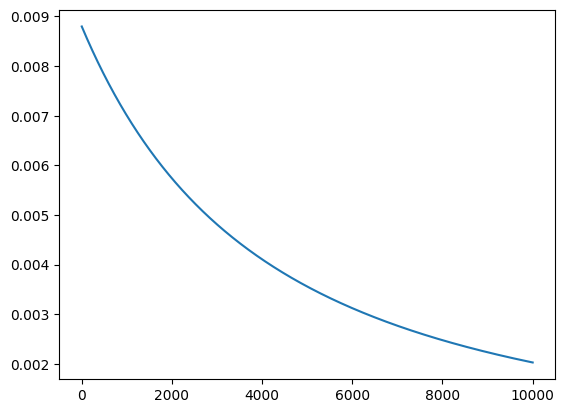

In [31]:
# visualizing the error after each epoch
plt.plot(np.arange(1,epochs+1), np.array(error_epoch))

In [32]:
# Final output from the model
print('Final out of the model:', output)
print('Actual output:', y)

Final out of the model: [[0.98222757 0.94101632 0.09151605]]
Actual output: [[1 1 0]]


In [33]:
# Error at the last epoch
print('Error at the last epoch:', error)

Error at the last epoch: [[0.00015793 0.00173954 0.00418759]]
